# ***K Nearest Neighbor - KNN Classifier*** 
*The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.*

*The goal of the k-nearest neighbor algorithm is to identify the nearest neighbors of a given query point, so that we can assign a class label to that point.*

### ***Importing Libraries***

In [22]:
# importing libraries
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visualization
%matplotlib inline

import seaborn as sns
# increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, roc_curve, auc, classification_report
import warnings
warnings.filterwarnings('ignore')

## ***Data Acquisition***


In [ ]:
# mount google drive 
from google.colab import drive
drive.mount('/content/drive')

In [15]:
# raw data in panda dataframe
df = pd.read_csv('/content/drive/MyDrive/CSE 445 Project/Online Education Cleanded Dataset.csv')
print('Data Frame Shape: \n{}'.format(df.shape))
#df.columns = df.columns.str.replace('Used smartphone/computer/laptop previously before online class?',
#'Used Electronic Devices?')
# shows five instances of the dataframe

# drops the first column of the dataset
df = df.iloc[: , 1:]
print('First few instances of the dataset: ')
df.head()

Data Frame Shape: 
(5715, 18)
First few instances of the dataset: 


,Level of study?,Age?,Used Electronic Devices??,Result increased after online education (comparatively)?,Knowledge increased after online education (comparatively)?,Happy with online education?,Education Institute Area?,Have Internet availability?,Broadband / Mobile Internet?,Total hours of study before online education?,Total hours of study after online education?,Class performance increased in online education?,Institute Type,Current location (During Study) ?,Gender,Faced any issue with online class?,Preferred device for an online course
0,1,20.0,1,0,1,0,1,0,0,4,3,0,1,0,1,1,1
1,0,25.0,0,0,0,0,1,0,1,4,4,0,1,0,1,1,1
2,0,25.0,1,1,1,1,0,0,1,5,2,1,1,0,0,1,0
3,1,21.0,1,1,0,1,1,1,1,5,3,0,0,1,1,1,1
4,0,22.0,1,0,0,0,0,0,1,4,2,1,1,1,1,0,1


In [16]:
# columns of the dataset
df.columns

Index(['Level of study?', 'Age?', 'Used Electronic Devices??',
       'Result increased after online education  (comparatively)?',
       'Knowledge increased after online education (comparatively)?',
       'Happy with online education?', 'Education Institute Area?',
       'Have Internet availability?', 'Broadband / Mobile Internet?',
       'Total hours of study before online education?',
       'Total hours of study after online education?',
       'Class performance increased in online education?', 'Institute Type',
       'Current location (During Study) ?', 'Gender',
       'Faced any issue with online class?',
       'Preferred device for an online course'],
      dtype='object')

### ***Splitting Dataset***
*Splitting the dataset in a 70:30 ratio.
70% for training & 30% for testing* 

In [17]:
# separating attributes and target
attribute = df.drop(columns = ['Happy with online education?'])
target = df['Happy with online education?']
print('Attribute Shape: ', attribute.shape)
print('Target Shape: ', target.shape)

Attribute Shape:  (5715, 16)
Target Shape:  (5715,)


In [18]:
target.value_counts()

0    3677
1    2038
Name: Happy with online education?, dtype: int64

In [19]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(attribute, target, train_size = 0.7, test_size = 0.3, random_state = 0)

In [20]:
print('For training: ')
print('Attribute Shape: ', X_train.shape)
print('Target Shape: ', y_train.shape)

print('\nFor testing: ')
print('Attribute Shape: ', X_test.shape)
print('Target Shape: ', y_test.shape)

For training: 
Attribute Shape:  (4000, 16)
Target Shape:  (4000,)

For testing: 
Attribute Shape:  (1715, 16)
Target Shape:  (1715,)


## ***Scaling the Columns***

In [21]:
df.describe()

,Level of study?,Age?,Used Electronic Devices??,Result increased after online education (comparatively)?,Knowledge increased after online education (comparatively)?,Happy with online education?,Education Institute Area?,Have Internet availability?,Broadband / Mobile Internet?,Total hours of study before online education?,Total hours of study after online education?,Class performance increased in online education?,Institute Type,Current location (During Study) ?,Gender,Faced any issue with online class?,Preferred device for an online course
count,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000
mean,0.353456,22.833946,0.860192,0.696588,0.358880,0.356605,0.787752,0.694663,0.510411,4.495538,2.990201,0.467192,0.349256,0.534208,0.553981,0.623797,0.363605
std,0.478085,2.054193,0.346818,0.459772,0.479714,0.479039,0.408936,0.460590,0.499935,0.962968,0.704683,0.498966,0.476777,0.498872,0.497121,0.484474,0.481079
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,23.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
#the columns that require scaling include:
# Age?, Total hours of study before online education?, Total hours of study after online education?
scale_vars = ['Age?','Total hours of study before online education?','Total hours of study after online education?']
scaler = MinMaxScaler()
df[scale_vars] = scaler.fit_transform(df[scale_vars])
df.head()

,Level of study?,Age?,Used Electronic Devices??,Result increased after online education (comparatively)?,Knowledge increased after online education (comparatively)?,Happy with online education?,Education Institute Area?,Have Internet availability?,Broadband / Mobile Internet?,Total hours of study before online education?,Total hours of study after online education?,Class performance increased in online education?,Institute Type,Current location (During Study) ?,Gender,Faced any issue with online class?,Preferred device for an online course
0,1,0.4,1,0,1,0,1,0,0,0.333333,0.5,0,1,0,1,1,1
1,0,0.9,0,0,0,0,1,0,1,0.333333,1.0,0,1,0,1,1,1
2,0,0.9,1,1,1,1,0,0,1,0.666667,0.0,1,1,0,0,1,0
3,1,0.5,1,1,0,1,1,1,1,0.666667,0.5,0,0,1,1,1,1
4,0,0.6,1,0,0,0,0,0,1,0.333333,0.0,1,1,1,1,0,1


### ***KNN Classifier***

X shape: (5715, 16)
y shape: (5715,)
K =  30 , Training Accuracy =  0.64875  Test Accuracy =  0.6279883381924198  Difference =  2.076166180758021 %
K =  40 , Training Accuracy =  0.651  Test Accuracy =  0.6332361516034986  Difference =  1.776384839650147 %
K =  50 , Training Accuracy =  0.651  Test Accuracy =  0.6309037900874636  Difference =  2.0096209912536467 %
K =  70 , Training Accuracy =  0.64975  Test Accuracy =  0.632069970845481  Difference =  1.768002915451905 %
K =  100 , Training Accuracy =  0.64725  Test Accuracy =  0.6349854227405248  Difference =  1.2264577259475162 %
K =  120 , Training Accuracy =  0.647  Test Accuracy =  0.6349854227405248  Difference =  1.201457725947519 %
K =  122 , Training Accuracy =  0.64675  Test Accuracy =  0.6355685131195336  Difference =  1.1181486880466496 %
K =  125 , Training Accuracy =  0.64675  Test Accuracy =  0.634402332361516  Difference =  1.234766763848405 %
K =  130 , Training Accuracy =  0.647  Test Accuracy =  0.634402332361516  D

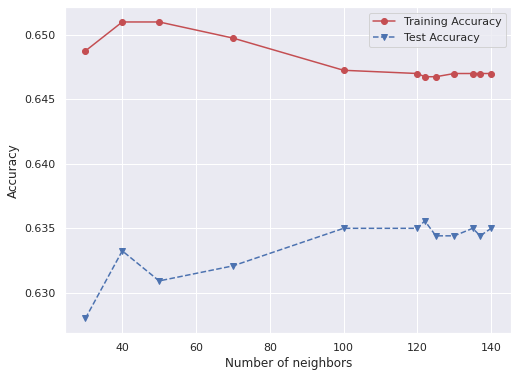

In [29]:
X = df.drop(columns = 'Happy with online education?').values# Input features (attributes)
y = df['Happy with online education?'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=0)

numNeighbors = [30, 40, 50, 70, 100, 120, 122, 125, 130, 135, 137, 140]
trainAcc = []
testAcc = []

for k in numNeighbors:
  knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
  knn.fit(X_train, y_train)
  y_predTrain = knn.predict(X_train)
  y_predTest = knn.predict(X_test)

  trainAcc.append(accuracy_score(y_train, y_predTrain))
  testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0

for i in numNeighbors:
  print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", 
        testAcc[index], " Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
  index+=1